In [1]:
from waketor.single_wake import *

In [2]:
import matplotlib.pylab as pl
import numpy as np
%matplotlib inline
pl.rc('font', size=14)
from IPython.display import HTML

In [3]:
D = 80.0   # Rotor diameter
c_t = 0.8  # Upstream wind turbine C_T
ti = 0.1   # Turbulence intensity


N = 100    # The resolution of the plot in x and y directions
X,Y = np.meshgrid(np.linspace(-1*D, 10*D,N), np.linspace(-3*D, 3*D,N))
vec = np.ones_like(X.flatten())
rel_pos = np.vstack([X.flatten(), Y.flatten(), 0.0*vec]).T

### Plotting the GCL

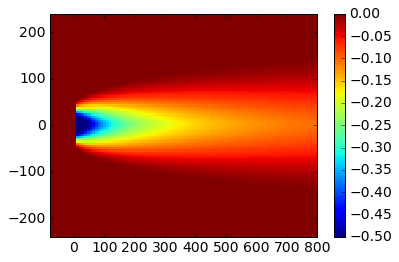

In [4]:
du = gcl(rel_pos, c_t*vec, D*vec, ti*vec).reshape(X.shape)
pl.pcolor(X,Y,du, vmin=-0.5, vmax=0.0)
pl.colorbar()
pl.axis('tight');

### Plotting the NOJ 

/home/pire/git/waketor/waketor/single_wake/noj.py:29: RuntimeWarning: divide by zero encountered in true_divide
  DU = - (1.0 - np.sqrt(1.0 - c_t)) / (1.0 + (k * x) / R) ** 2.0


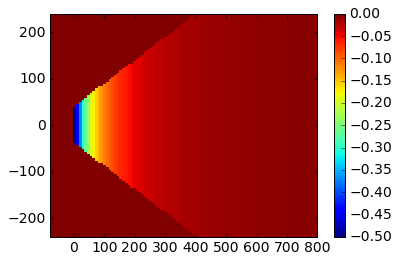

In [5]:
k = 0.5 # wake expansion parameter
du = noj(rel_pos, c_t*vec, D*vec, k*vec).reshape(X.shape)
pl.pcolor(X,Y,du, vmin=-0.5, vmax=0.0)
pl.colorbar()
pl.axis('tight');

### Plotting Ainslie

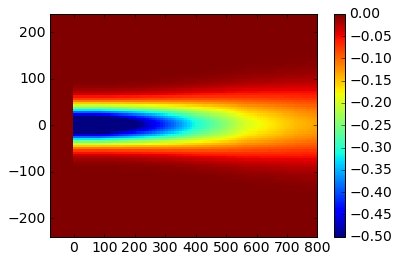

In [6]:
du = ainslie(rel_pos, c_t*vec, D*vec, ti*vec).reshape(X.shape)
pl.pcolor(X,Y,du, vmin=-0.5, vmax=0.0)
pl.colorbar()
pl.axis('tight');

### Benchmark

In [7]:
import timeit

In [8]:
t_ainslie = timeit.timeit('ainslie(rel_pos, c_t*vec, D*vec, ti*vec)', 
              setup="from __main__ import ainslie, rel_pos, c_t, D, ti, vec", 
              number=5)/5

t_gcl = timeit.timeit('gcl(rel_pos, c_t*vec, D*vec, ti*vec)', 
              setup="from __main__ import gcl, rel_pos, c_t, D, ti, vec", 
              number=10)/10

t_noj = timeit.timeit('noj(rel_pos, c_t*vec, D*vec, k*vec)', 
              setup="from __main__ import noj, rel_pos, c_t, D, k, vec", 
             number=100)/100

/home/pire/git/waketor/waketor/single_wake/noj.py:29: RuntimeWarning: divide by zero encountered in true_divide
  DU = - (1.0 - np.sqrt(1.0 - c_t)) / (1.0 + (k * x) / R) ** 2.0


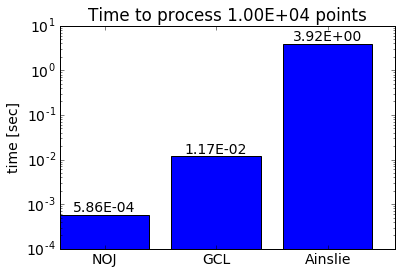

In [9]:
pl.bar(range(3),[t_noj, t_gcl, t_ainslie], log=True)
pl.xticks(np.arange(3)+0.4, ['NOJ', 'GCL', 'Ainslie'])
for x,y in zip(range(3),[t_noj, t_gcl, t_ainslie]):
    pl.text(x+0.4, y, '%.2E' % y, ha='center', va= 'bottom')
pl.ylabel('time [sec]')
pl.title('Time to process {:.2E} points'.format(N**2))

In [10]:
print('Ainslie is {:2.2f} times slower than NOJ'.format(t_ainslie / t_noj))
print('GCL is {:2.2f} times slower than NOJ'.format(t_gcl / t_noj))

Ainslie is 6700.68 times slower than NOJ
GCL is 20.01 times slower than NOJ
